DEMOSTRACIÓN: ANÁLISIS DE SERIES TEMPORALES EN EL SECTOR PETROLERO

1. ANÁLISIS COMPLETO DE PRODUCCIÓN PETROLERA
--------------------------------------------------
Dataset de producción: (124, 8)
Período: 2023-01-01 00:00:00 a 2023-01-31 18:00:00

Estadísticas de producción:
• Producción promedio: 1894.68 BPD
• Producción máxima: 2520.00 BPD
• Producción mínima: 1250.00 BPD
• Cambio total: 99.20%


2. ANÁLISIS DE SENSORES CON RESAMPLING
--------------------------------------------------
Dataset de sensores: (192, 6)
Frecuencia original: cada 15 minutos

Resampling a diferentes frecuencias:
• Datos originales: 192 registros
• Resampling a 1 hora: 48 registros
• Resampling a 1 día: 2 registros


3. ANÁLISIS DE EVENTOS OPERACIONALES
--------------------------------------------------
Dataset de eventos: (64, 6)

Análisis de eventos por tipo:
                         duracion_horas           impacto_produccion      
                                  count  mean sum               mean   sum


/tmp/ipykernel_13581/2423120383.py:69: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_sensores_hora = df_sensores[columnas_numericas].resample('H').mean()


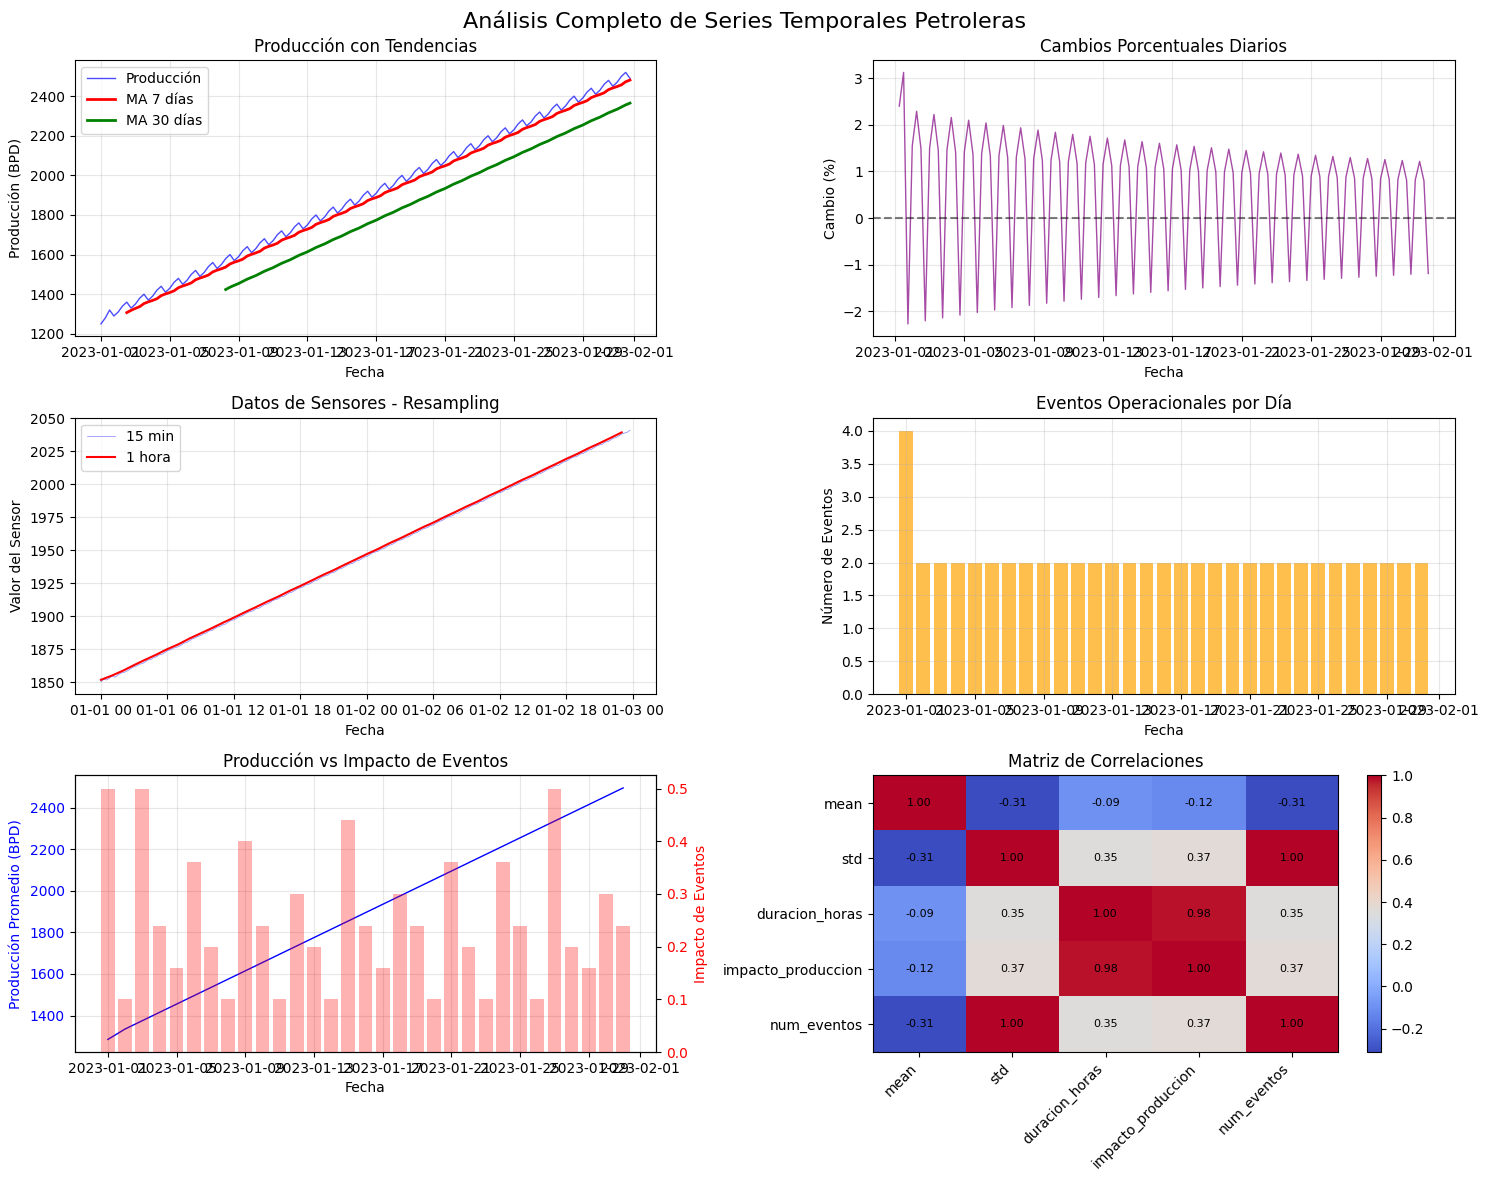



6. ANÁLISIS DE PATRONES TEMPORALES
--------------------------------------------------
Producción promedio por hora del día:
             mean         std
hora                         
0     1869.354839  364.800726
6     1899.354839  364.800726
12    1920.000000  363.684845
18    1890.000000  363.684845

Producción promedio por día de la semana:
              mean         std
dia_semana                    
0           1895.0  406.687517
1           1935.0  406.687517
2           1835.0  323.851818
3           1875.0  323.851818
4           1915.0  323.851818
5           1955.0  323.851818
6           1853.0  409.673811


7. DETECCIÓN DE ANOMALÍAS
--------------------------------------------------
Anomalías detectadas: 0 (0.00%)

Top 5 anomalías (mayor producción):
Empty DataFrame
Columns: [produccion_bpd, produccion_ma_7d, limite_superior]
Index: []


8. RESUMEN Y CONCLUSIONES
--------------------------------------------------
RESUMEN DEL ANÁLISIS TEMPORAL:
• Período analizado: 2023-0

In [3]:
"""
DEMOSTRACIÓN: ANÁLISIS DE SERIES TEMPORALES EN EL SECTOR PETROLERO
Sesión 12: Series Temporales en Pandas

Este script demuestra técnicas avanzadas de análisis temporal aplicadas a datos petroleros
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configuración para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("=" * 80)
print("DEMOSTRACIÓN: ANÁLISIS DE SERIES TEMPORALES EN EL SECTOR PETROLERO")
print("=" * 80)

# =============================================================================
# DEMOSTRACIÓN 1: ANÁLISIS COMPLETO DE PRODUCCIÓN
# =============================================================================

print("\n1. ANÁLISIS COMPLETO DE PRODUCCIÓN PETROLERA")
print("-" * 50)

# Cargar datos de producción
df_produccion = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_12/datos/produccion_historica.csv')
df_produccion['fecha'] = pd.to_datetime(df_produccion['fecha'])
df_produccion.set_index('fecha', inplace=True)

print(f"Dataset de producción: {df_produccion.shape}")
print(f"Período: {df_produccion.index.min()} a {df_produccion.index.max()}")

# Análisis de tendencias
df_produccion['produccion_ma_7d'] = df_produccion['produccion_bpd'].rolling(window=7).mean()
df_produccion['produccion_ma_30d'] = df_produccion['produccion_bpd'].rolling(window=30).mean()

# Calcular cambios porcentuales
df_produccion['cambio_diario'] = df_produccion['produccion_bpd'].pct_change() * 100
df_produccion['cambio_semanal'] = df_produccion['produccion_bpd'].pct_change(periods=7) * 100

print("\nEstadísticas de producción:")
print(f"• Producción promedio: {df_produccion['produccion_bpd'].mean():.2f} BPD")
print(f"• Producción máxima: {df_produccion['produccion_bpd'].max():.2f} BPD")
print(f"• Producción mínima: {df_produccion['produccion_bpd'].min():.2f} BPD")
print(f"• Cambio total: {((df_produccion['produccion_bpd'].iloc[-1] / df_produccion['produccion_bpd'].iloc[0]) - 1) * 100:.2f}%")

# =============================================================================
# DEMOSTRACIÓN 2: ANÁLISIS DE SENSORES CON RESAMPLING
# =============================================================================

print("\n\n2. ANÁLISIS DE SENSORES CON RESAMPLING")
print("-" * 50)

# Cargar datos de sensores
df_sensores = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_12/datos/sensores_temporales.csv')
df_sensores['timestamp'] = pd.to_datetime(df_sensores['timestamp'])
df_sensores.set_index('timestamp', inplace=True)

print(f"Dataset de sensores: {df_sensores.shape}")
print(f"Frecuencia original: cada 15 minutos")
#Sparamos columnas numericas y categoricas
columnas_numericas = df_sensores.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_sensores.select_dtypes(exclude=[np.number]).columns.tolist()
# Resampling a diferentes frecuencias
df_sensores_hora = df_sensores[columnas_numericas].resample('H').mean()
df_sensores_dia = df_sensores.resample('D').agg({
    'valor': ['mean', 'std', 'min', 'max'],
    'pozo_id': 'first',
    'tipo_sensor': 'first'
})

print("\nResampling a diferentes frecuencias:")
print(f"• Datos originales: {len(df_sensores)} registros")
print(f"• Resampling a 1 hora: {len(df_sensores_hora)} registros")
print(f"• Resampling a 1 día: {len(df_sensores_dia)} registros")

# =============================================================================
# DEMOSTRACIÓN 3: ANÁLISIS DE EVENTOS OPERACIONALES
# =============================================================================

print("\n\n3. ANÁLISIS DE EVENTOS OPERACIONALES")
print("-" * 50)

# Cargar datos de eventos
df_eventos = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_12/datos/eventos_operacionales.csv')
df_eventos['fecha_evento'] = pd.to_datetime(df_eventos['fecha_evento'])
df_eventos.set_index('fecha_evento', inplace=True)

print(f"Dataset de eventos: {df_eventos.shape}")

# Análisis de eventos por tipo
eventos_por_tipo = df_eventos.groupby('tipo_evento').agg({
    'duracion_horas': ['count', 'mean', 'sum'],
    'impacto_produccion': ['mean', 'sum']
}).round(2)

print("\nAnálisis de eventos por tipo:")
print(eventos_por_tipo)

# Resampling de eventos por día
eventos_diarios = df_eventos.resample('D').agg({
    'duracion_horas': 'sum',
    'impacto_produccion': 'sum',
    'tipo_evento': 'count'
}).rename(columns={'tipo_evento': 'num_eventos'})

print(f"\nEventos agregados por día: {len(eventos_diarios)} registros")

# =============================================================================
# DEMOSTRACIÓN 4: ANÁLISIS INTEGRADO
# =============================================================================

print("\n\n4. ANÁLISIS INTEGRADO - CORRELACIÓN ENTRE VARIABLES")
print("-" * 50)

# Resampling de producción a frecuencia diaria
produccion_diaria = df_produccion.resample('D')['produccion_bpd'].agg(['mean', 'std'])

# Combinar datos
analisis_integrado = pd.concat([produccion_diaria, eventos_diarios], axis=1)
analisis_integrado = analisis_integrado.fillna(0)

print("Análisis integrado - Producción y eventos:")
print(analisis_integrado.head(10))

# Calcular correlaciones
correlaciones = analisis_integrado.corr()
print("\nCorrelaciones entre variables:")
print(correlaciones)

# =============================================================================
# DEMOSTRACIÓN 5: VISUALIZACIÓN AVANZADA
# =============================================================================

print("\n\n5. VISUALIZACIÓN AVANZADA DE SERIES TEMPORALES")
print("-" * 50)

# Crear figura con múltiples subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Análisis Completo de Series Temporales Petroleras', fontsize=16)

# Gráfico 1: Producción con tendencias
axes[0, 0].plot(df_produccion.index, df_produccion['produccion_bpd'], 'b-', linewidth=1, alpha=0.7, label='Producción')
axes[0, 0].plot(df_produccion.index, df_produccion['produccion_ma_7d'], 'r-', linewidth=2, label='MA 7 días')
axes[0, 0].plot(df_produccion.index, df_produccion['produccion_ma_30d'], 'g-', linewidth=2, label='MA 30 días')
axes[0, 0].set_title('Producción con Tendencias')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Producción (BPD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Cambios porcentuales
axes[0, 1].plot(df_produccion.index, df_produccion['cambio_diario'], 'purple', linewidth=1, alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Cambios Porcentuales Diarios')
axes[0, 1].set_xlabel('Fecha')
axes[0, 1].set_ylabel('Cambio (%)')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Sensores con resampling
axes[1, 0].plot(df_sensores.index, df_sensores['valor'], 'b-', linewidth=0.5, alpha=0.5, label='15 min')
axes[1, 0].plot(df_sensores_hora.index, df_sensores_hora['valor'], 'r-', linewidth=1.5, label='1 hora')
axes[1, 0].set_title('Datos de Sensores - Resampling')
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Valor del Sensor')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Eventos operacionales
axes[1, 1].bar(eventos_diarios.index, eventos_diarios['num_eventos'], alpha=0.7, color='orange')
axes[1, 1].set_title('Eventos Operacionales por Día')
axes[1, 1].set_xlabel('Fecha')
axes[1, 1].set_ylabel('Número de Eventos')
axes[1, 1].grid(True, alpha=0.3)

# Gráfico 5: Impacto de eventos en producción
axes[2, 0].plot(analisis_integrado.index, analisis_integrado['mean'], 'b-', linewidth=1, label='Producción')
axes[2, 0].set_xlabel('Fecha')
axes[2, 0].set_ylabel('Producción Promedio (BPD)', color='b')
axes[2, 0].tick_params(axis='y', labelcolor='b')
axes[2, 0].grid(True, alpha=0.3)

ax2 = axes[2, 0].twinx()
ax2.bar(analisis_integrado.index, analisis_integrado['impacto_produccion'], alpha=0.3, color='red', label='Impacto Eventos')
ax2.set_ylabel('Impacto de Eventos', color='red')
ax2.tick_params(axis='y', labelcolor='red')
axes[2, 0].set_title('Producción vs Impacto de Eventos')

# Gráfico 6: Correlación entre variables
im = axes[2, 1].imshow(correlaciones, cmap='coolwarm', aspect='auto')
axes[2, 1].set_title('Matriz de Correlaciones')
axes[2, 1].set_xticks(range(len(correlaciones.columns)))
axes[2, 1].set_yticks(range(len(correlaciones.index)))
axes[2, 1].set_xticklabels(correlaciones.columns, rotation=45, ha='right')
axes[2, 1].set_yticklabels(correlaciones.index)

# Agregar valores de correlación
for i in range(len(correlaciones.index)):
    for j in range(len(correlaciones.columns)):
        text = axes[2, 1].text(j, i, f'{correlaciones.iloc[i, j]:.2f}',
                               ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=axes[2, 1])

plt.tight_layout()
plt.show()

# =============================================================================
# DEMOSTRACIÓN 6: ANÁLISIS DE PATRONES TEMPORALES
# =============================================================================

print("\n\n6. ANÁLISIS DE PATRONES TEMPORALES")
print("-" * 50)

# Análisis de patrones por hora del día
df_produccion['hora'] = df_produccion.index.hour
produccion_por_hora = df_produccion.groupby('hora')['produccion_bpd'].agg(['mean', 'std'])

print("Producción promedio por hora del día:")
print(produccion_por_hora)

# Análisis de patrones por día de la semana
df_produccion['dia_semana'] = df_produccion.index.dayofweek
produccion_por_dia = df_produccion.groupby('dia_semana')['produccion_bpd'].agg(['mean', 'std'])

print("\nProducción promedio por día de la semana:")
print(produccion_por_dia)

# =============================================================================
# DEMOSTRACIÓN 7: DETECCIÓN DE ANOMALÍAS
# =============================================================================

print("\n\n7. DETECCIÓN DE ANOMALÍAS")
print("-" * 50)

# Detectar anomalías usando rolling statistics
df_produccion['produccion_ma_7d'] = df_produccion['produccion_bpd'].rolling(window=7).mean()
df_produccion['produccion_std_7d'] = df_produccion['produccion_bpd'].rolling(window=7).std()

# Límites de control (2 desviaciones estándar)
df_produccion['limite_superior'] = df_produccion['produccion_ma_7d'] + (2 * df_produccion['produccion_std_7d'])
df_produccion['limite_inferior'] = df_produccion['produccion_ma_7d'] - (2 * df_produccion['produccion_std_7d'])

# Detectar anomalías
df_produccion['es_anomalia'] = (
    (df_produccion['produccion_bpd'] > df_produccion['limite_superior']) |
    (df_produccion['produccion_bpd'] < df_produccion['limite_inferior'])
)

num_anomalias = df_produccion['es_anomalia'].sum()
print(f"Anomalías detectadas: {num_anomalias} ({num_anomalias/len(df_produccion)*100:.2f}%)")

# Mostrar las anomalías más significativas
anomalias = df_produccion[df_produccion['es_anomalia']].nlargest(5, 'produccion_bpd')
print("\nTop 5 anomalías (mayor producción):")
print(anomalias[['produccion_bpd', 'produccion_ma_7d', 'limite_superior']])

# =============================================================================
# DEMOSTRACIÓN 8: RESUMEN Y CONCLUSIONES
# =============================================================================

print("\n\n8. RESUMEN Y CONCLUSIONES")
print("-" * 50)

print("RESUMEN DEL ANÁLISIS TEMPORAL:")
print(f"• Período analizado: {df_produccion.index.min()} a {df_produccion.index.max()}")
print(f"• Total de registros de producción: {len(df_produccion)}")
print(f"• Total de registros de sensores: {len(df_sensores)}")
print(f"• Total de eventos operacionales: {len(df_eventos)}")

# Análisis de tendencias
produccion_inicial = df_produccion['produccion_bpd'].iloc[0]
produccion_final = df_produccion['produccion_bpd'].iloc[-1]
tendencia = ((produccion_final - produccion_inicial) / produccion_inicial) * 100

print(f"\nANÁLISIS DE TENDENCIAS:")
print(f"• Producción inicial: {produccion_inicial:.2f} BPD")
print(f"• Producción final: {produccion_final:.2f} BPD")
print(f"• Cambio total: {tendencia:.2f}%")

if tendencia > 0:
    print("  → Tendencia POSITIVA en el período analizado")
else:
    print("  → Tendencia NEGATIVA en el período analizado")

print(f"\nANÁLISIS DE EVENTOS:")
print(f"• Total de eventos: {len(df_eventos)}")
print(f"• Duración promedio: {df_eventos['duracion_horas'].mean():.2f} horas")
print(f"• Impacto promedio en producción: {df_eventos['impacto_produccion'].mean():.2f}")

print(f"\nDETECCIÓN DE ANOMALÍAS:")
print(f"• Anomalías detectadas: {num_anomalias}")
print(f"• Porcentaje de anomalías: {num_anomalias/len(df_produccion)*100:.2f}%")

print("\nAPLICACIONES PRÁCTICAS:")
print("• Monitoreo continuo de producción")
print("• Detección temprana de problemas")
print("• Optimización de operaciones")
print("• Planificación de mantenimiento")
print("• Análisis de correlaciones operacionales")

print("\n" + "=" * 80)
print("DEMOSTRACIÓN COMPLETADA")
print("=" * 80) 